<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/EjerciciosParciales2022_2/P32022_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 3 - Señales y Sistemas 2022-2

## Punto 1 (2.5 puntos)

Encuentre la función de transferencia que caracteriza el sistema presentado en la Figura (asuma condiciones iniciales cero):

![Péndulo Elástico Amortiguado](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/damped_spring.png?raw=1)

Posteriormente, encuentre el sistema equivalente del modelo masa, resorte, amortguador, a partir del siguiente circuito eléctrico:

![Circuito RLC](https://github.com/amalvarezme/SenalesSistemas/blob/master/Otros/circuitoRLC.jpeg?raw=1)


Finalmente, proponga unos valores de $m$, $k$ y $c$ y sus equivalente $R$, $L$ y $C$ para simular un sistema subamortiguado. Presente las simulaciones y gráficas de polos y ceros, diagrama de Bode, respuesta impulso y respuesta al escalón.

Nota: para las gráficas de Bode, respuesta impulso y respuesta al escalón, se sugiere utilizar el paquete

from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot

Recuerde instalar la última versión de sympy:

!pip install sympy --upgrade



# Solución

El sistema masa, resorte y amortiguador se puede modelar a partir de la conservación de fuerzas:

$$
F_\text{S}(t) + F_\text{F}(t) + F_\text{I}(t) = F_\text{E}(t)
$$

donde $F_\text{S}(t) = k y(t)$, $F_\text{F}(t) = c \frac{d y(t)}{dt}$, y $F_\text{I}(t) = m \frac{d^2 y(t)}{dt^2}$.

Por consiguiente:

$$ m\frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k y(t) = F_\text{E}(t) = x(t)$$

Aplicando la transformada de Laplace $\mathfrak{L}\left\{\frac{d^nx(t)}{dt}\right\}=s^nX(s)$, tenemos que:

$$ms^2Y(s)+csY(s)+kY(s)=X(s)$$

y:

$$\boxed{H(s) = \frac{Y(s)}{X(s)}=\frac{1}{ms^2+cs+k}}$$

Ahora, para el circuito eléctrico presentdo, y utilizando impedancias transformadas, tenemos que:

$$V_i(s)=LsI_1(s)+(I_1(s)-I_2(s))\frac{1}{cs}$$

$$(I_2(s)-I_1(s))\frac{1}{cs}+I_2(s)R = 0$$

$$V_o(s) = R I_2(s)$$

Despejando $I_1(s)$ respecto a $I_2(s)$:

$$\frac{1}{cs}I_2(s)-\frac{1}{cs}I_1(s) + I_2(s)R = 0 $$

$$\boxed{I_1(s) = I_2(s)(1+CRs)}$$

Reemplazando respecto a la primera ecuación:

$$V_i(s)=LsI_2(s)(1+CRs)+(I_2(s)(1+CRs)-I_2(s))\frac{1}{Cs}$$

$$V_i(s) = LsI_2(s)+CRLs^2I_2(s)+I_2(s)\frac{1}{Cs}+I_2(s)R-I_2(s)\frac{1}{Cs}$$

$$V_i(s) = I_2(s)(CRLs^2+Ls+R)$$

$$\frac{I_2(s)}{V_i(s)}=\frac{1}{CRLs^2+Ls+R}$$

$$\frac{RI_2(s)}{V_i(s)}=\frac{V_o(s)}{V_i(s)}=\frac{R}{CRLs^2+Ls+R}$$

Factorizando:


$$\boxed{H(s)=\frac{V_o(s)}{V_i(s)}=\frac{1}{CLs^2+\frac{L}{R}s+1}}$$

Revisando la equivalancia entre sistemas desde las Ecuaciones Diferenciales Ordinarias, tenemos que:


|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
                            |
|                         | $CL$                              | $m$                                     |
|                         | $L/R$                              | $c$                                     |
|                         | $1$                    | $k$                           |

In [ ]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 4.8 MB/s 
  Attempting uninstall: sympy
    Found existing installation: sympy 1.7.1
    Uninstalling sympy-1.7.1:
      Successfully uninstalled sympy-1.7.1


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

Teniendo en cuenta la forma canónica:

$$H(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$


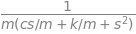

In [ ]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

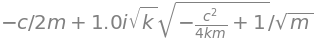

In [ ]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

Ahora, para sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{a_1}{2\sqrt{a_0 a_2}}<1$$

$$0<\frac{c}{2\sqrt{k m}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{1}{4}=0.25$$


In [ ]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

## Polos y ceros

In [ ]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


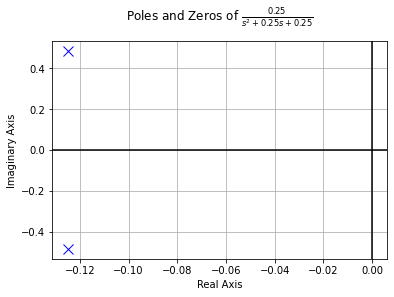

In [ ]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

## Diagrama de Bode

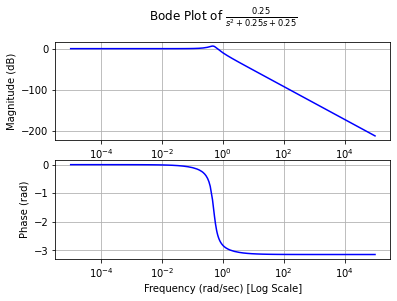

In [ ]:
bode_plot(tf1)

## Respuesta impulso

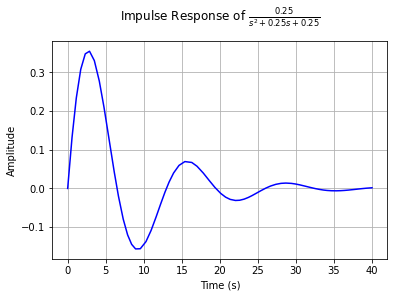

In [ ]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

# Respuesta al escalón

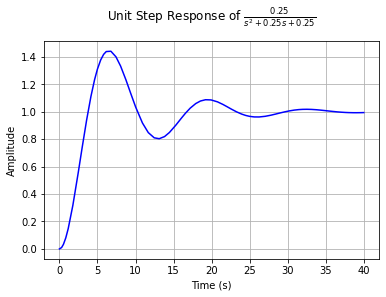

In [ ]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

## Punto 2 (2.5 puntos)

Sea el demodulador en amplitud presentado en la siguiente figura:

![Circuito RLC](https://github.com/amalvarezme/SenalesSistemas/blob/master/Otros/AM.jpeg?raw=1)

Asumiendo $\theta_0 = 0$, presente una simulación sobre Python para el proceso de modulación y demodulación en amplitud, de 5 segundos de su canción favorita de Youtube. Especifique adecuadamente las consideraciones de diseño en tiempo y en frecuencia (con las gráficas pertinentes), y reproduzca el segmento de la canción para cada una de las etapas principales del procesos de modulación y demodulación.

## Solución:

Se descarga el segmento de la canción de Youtube, se extrae el audio y se convierte a .wav:

In [ ]:
#simulación con canción de youtube
#instalar api youtube-dl
! pip install youtube-dl
#descargar canción de interés
link="https://www.youtube.com/watch?v=LvetJ9U_tVY&ab_channel=Slipknot"
! youtube-dl --extract-audio -o "audio.%(mp3)s" --audio-format mp3  {link}

#convertir a .wav con ffmpeg para extraer audio en python
!ffmpeg -i audio.mp3 output.wav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.2 MB/s 
[youtube] LvetJ9U_tVY: Downloading webpage
[youtube] LvetJ9U_tVY: Downloading player 11667490
[download] Destination: audio.NA
[download] 100% of 3.85MiB in 01:18
[ffmpeg] Destination: audio.mp3
Deleting original file audio.NA (pass -k to keep)
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3

Se lee el archivo .wav con la librería soundfile:

In [ ]:
#instalar soundfile para cargar .wav
!pip install soundfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import soundfile as sf # para instalar pip install soundfile
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 48000.00[Hz]
audio output.wav


In [ ]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 20 #tiempo incio a procesar seg
tf = 25 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [ ]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

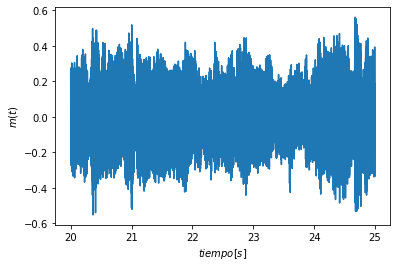

In [ ]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(ti,tf,1/fs) # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m(t)$')
plt.show()

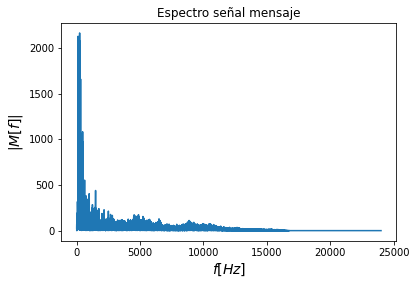

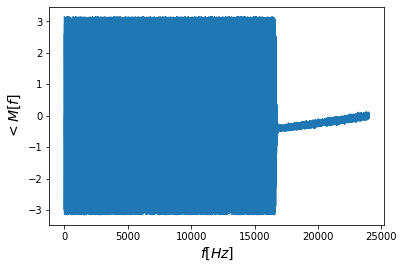

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

Se fija una $F_o >> F_{max},$ para nuestro caso:

$$\boxed{F_o = 15000 [Hz]}$$



In [ ]:
Fo = 15000 #frecuencia portadora
c = np.cos(2*np.pi*Fo*tt) #portadora

In [ ]:
#repoducir portadora
Audio(c,rate=fs)

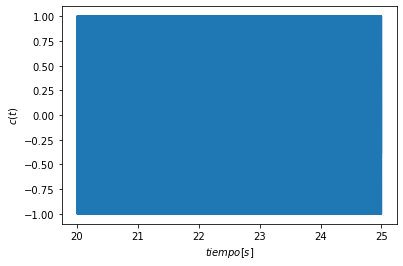

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$c(t)$')
plt.show()

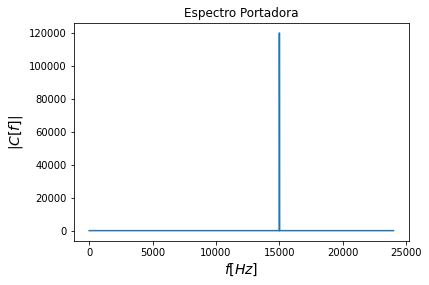

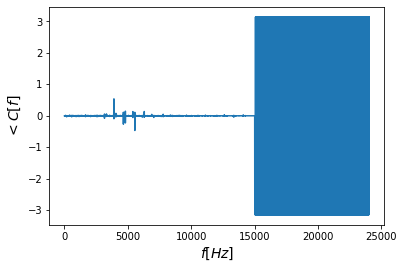

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [ ]:
#señal modulada
A1 = 2
y = A1*m*c #señal modulada en AM

In [ ]:
#repoducir modulada
Audio(y,rate=fs)

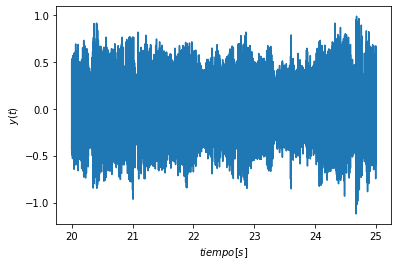

In [ ]:
plt.plot(tt,y) #graficar señal modulada en el tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$y(t)$')
plt.show()

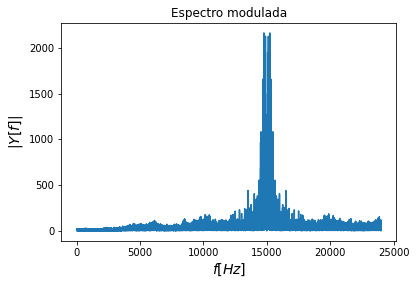

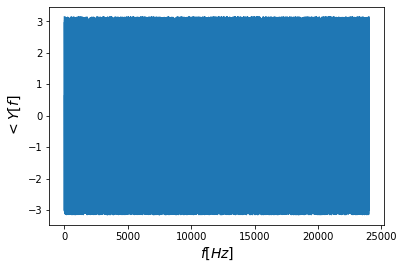

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

In [ ]:
d = y*c #señal demodulada

#repoducir señal demodulada
Audio(d,rate=fs)

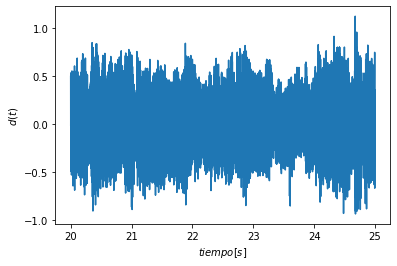

In [ ]:
plt.plot(tt,d) #graficar señal demodulada en tiempo
plt.xlabel('$tiempo [s]$')
plt.ylabel('$d(t)$')
plt.show()

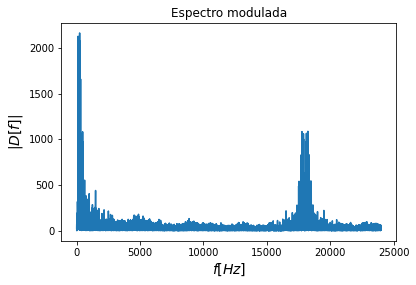

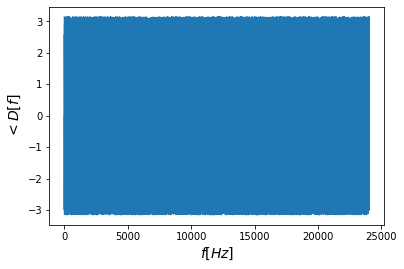

In [ ]:
#Fourier señal demodulada
Dw = np.fft.rfft(d) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Dw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|D[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Dw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<D[f]$',fontsize = 14)
plt.show()

## Simulación filtro pasabajas (IIR)

In [ ]:
from scipy.signal import butter as bw
from scipy.signal import freqz_zpk


N = 10 #orden el filtro
Wn = 14950 #banda pasante
filt = 'lowpass' #tipo del filtro (pasa-baja, pasa-alta, pasabanda, rechazabanda)
out = 'zpk' #la funcion retorna los polos y ceros junto con la ganancia. Para usar numerador y denominador usar 'ba' junto con freqz
zeros, poles, gain = bw(N, Wn, btype=filt, output=out, fs=fs)
w, h = freqz_zpk(zeros, poles, gain, fs=fs) #Para indicar la longitud usar worN=K


In [ ]:
from matplotlib.patches import Circle
#gráfica polos y ceros
def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show() 

def show_zp(z, p, title= 'Z-plane'): # Mostrar la ubicación de los polos y los zeros
  ax = plt.gca()
    
  ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
  ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
  unit_circle = Circle((0,0), radius=1, fill=False,
                        color='black', ls='solid', alpha=0.9)
  ax.add_patch(unit_circle)
  ax.axvline(0, color='0.7')
  ax.axhline(0, color='0.7')
    
  plt.title(title)
  plt.xlabel(r'Re{$z$}')
  plt.ylabel(r'Im{$z$}')
  plt.axis('equal')
  plt.xlim((-2, 2))
  plt.ylim((-2, 2))
  plt.grid()  

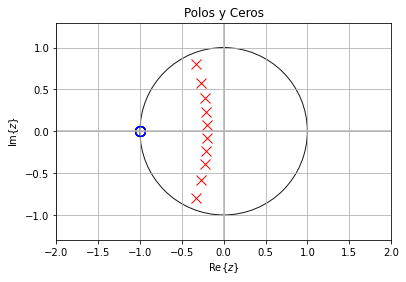

In [ ]:
show_zp(zeros, poles, title='Polos y Ceros')#gráfica polos y ceros

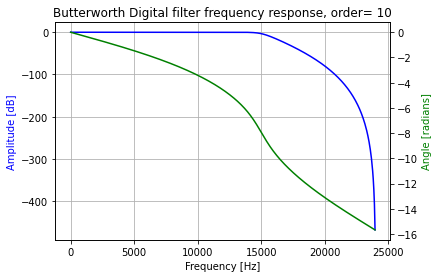

In [ ]:
plot_freq_response('Butterworth', w, h, N) #gráfica de bode del filtro

In [ ]:
#filtrar señal
from scipy.signal import filtfilt

num,den = bw(N, Wn, btype=filt, fs=fs)

xf = filtfilt(num, den, d, axis=0)#filtro pasabajos sobre señal demodulada d
me = (2/A1)*xf #señal reescalada


In [ ]:
#repoducir señal recuperada
Audio(me,rate=fs)

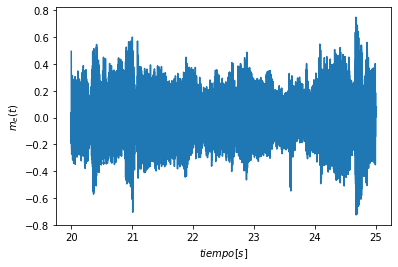

In [ ]:
plt.plot(tt,me) #graficar señal recuperada
plt.xlabel('$tiempo [s]$')
plt.ylabel('$m_e(t)$')
plt.show()

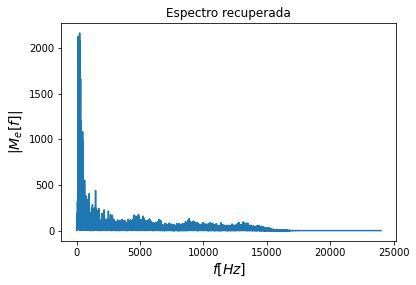

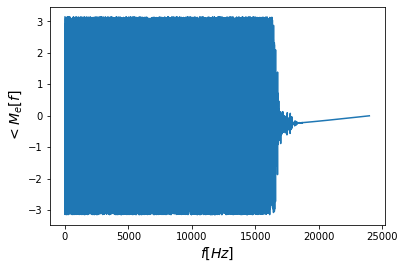

In [ ]:
#Fourier señal recuperada
Mew = np.fft.rfft(me) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Mew))#se grafica la magnitud
plt.title(r'Espectro recuperada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M_e[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Mew))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M_e[f]$',fontsize = 14)
plt.show()